In [1]:
import sys
print(sys.executable)


C:\Users\Yash\AppData\Local\Programs\Python\Python311\python.exe


In [2]:
import sys
!{sys.executable} -m pip install folium



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\Yash\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [1]:
import folium
print(folium.__version__)


0.20.0


In [3]:
from folium.plugins import HeatMap


  Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington and Chelsea 

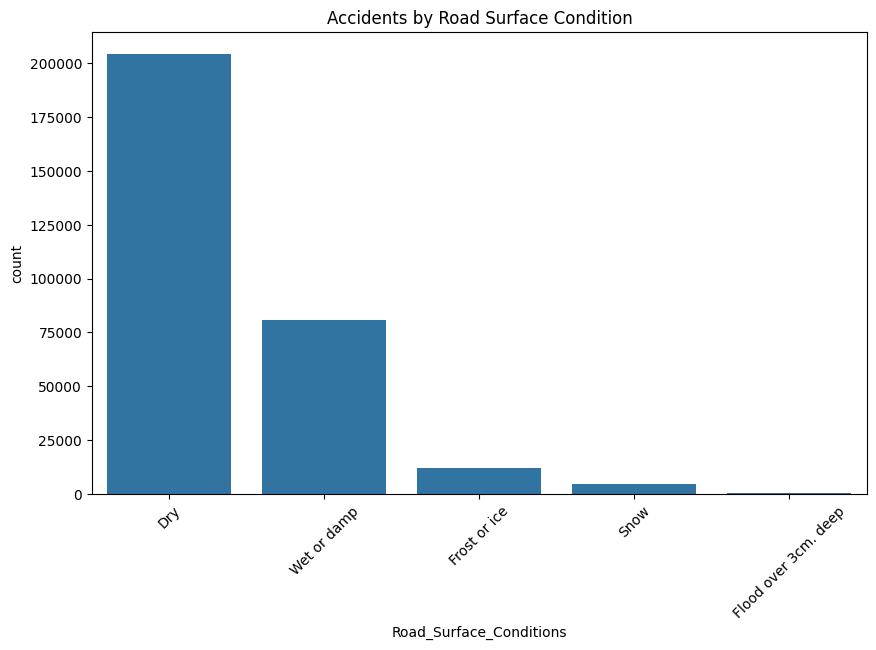

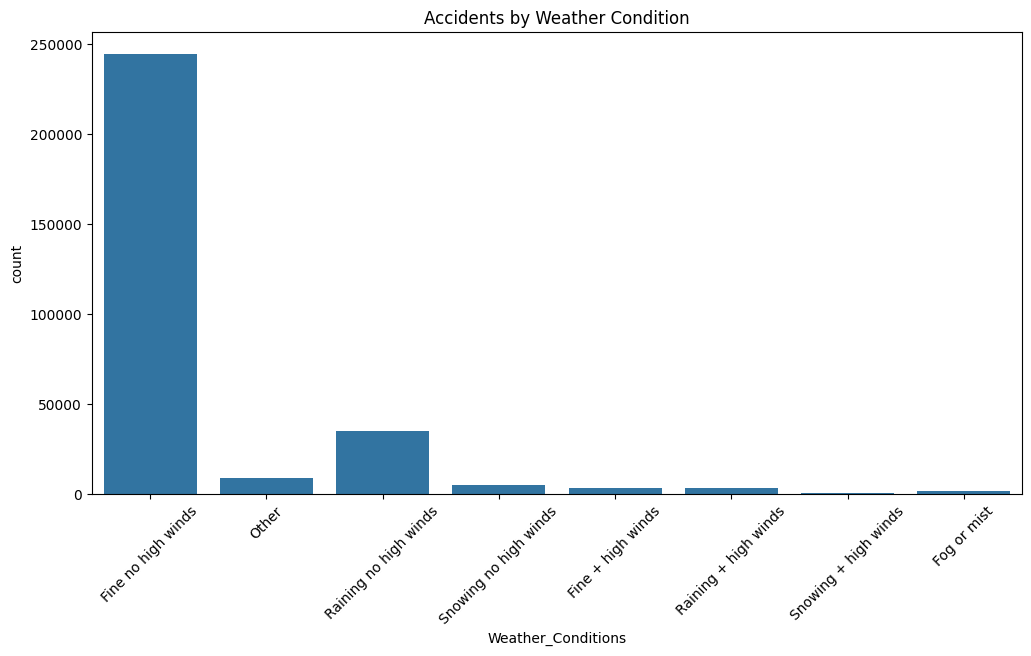

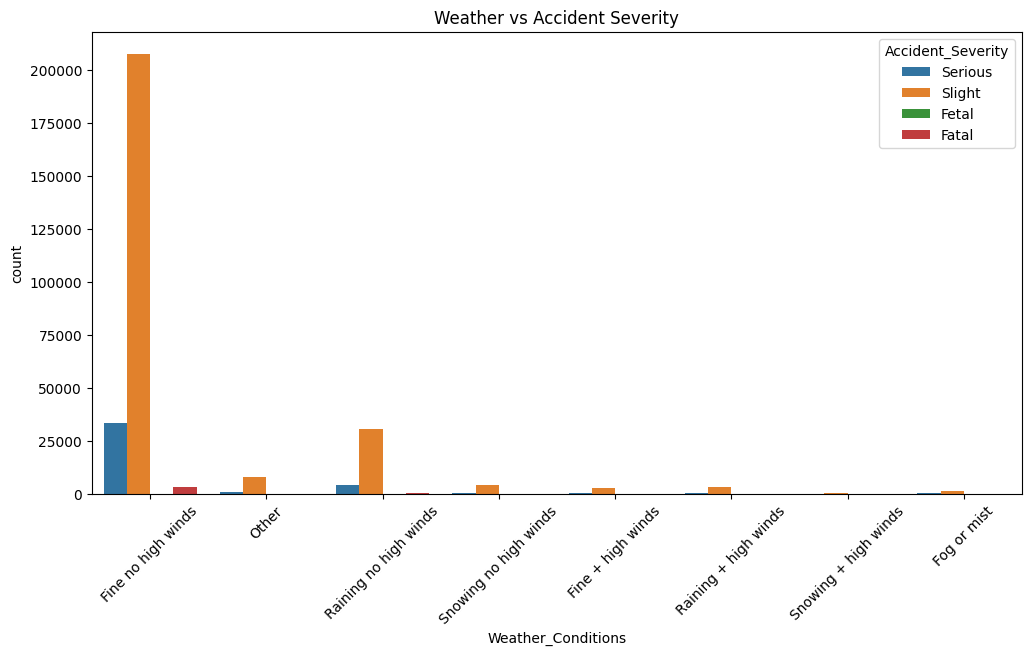

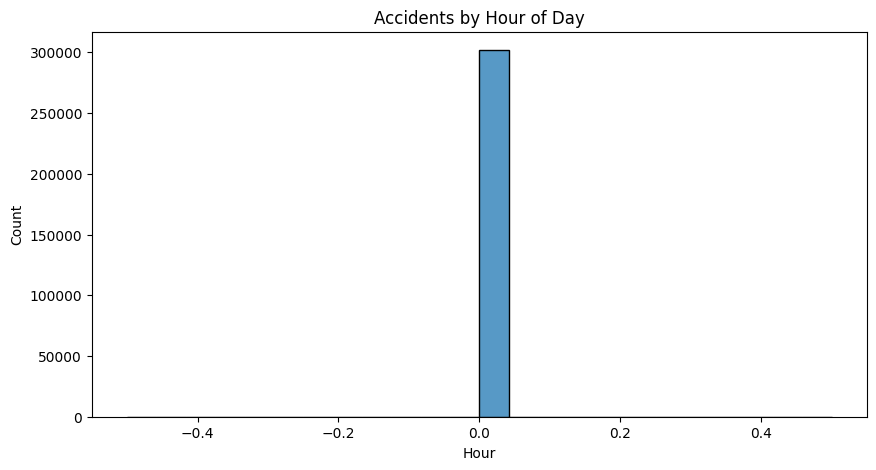

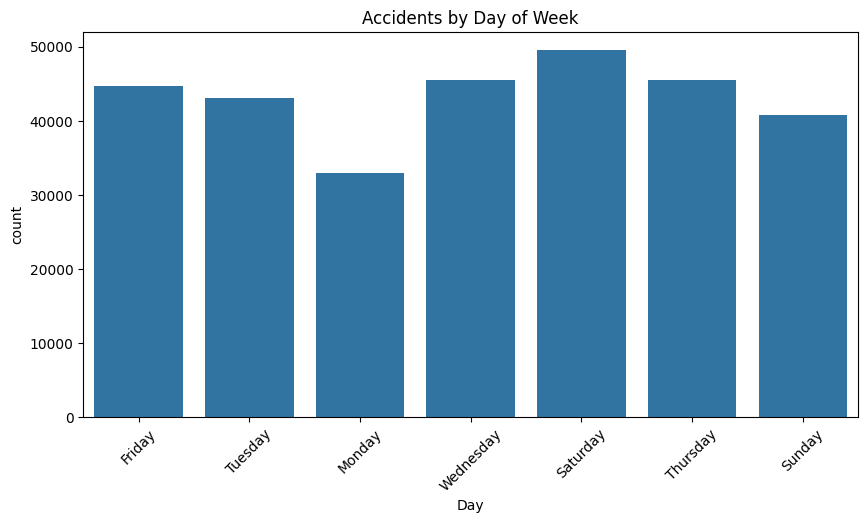

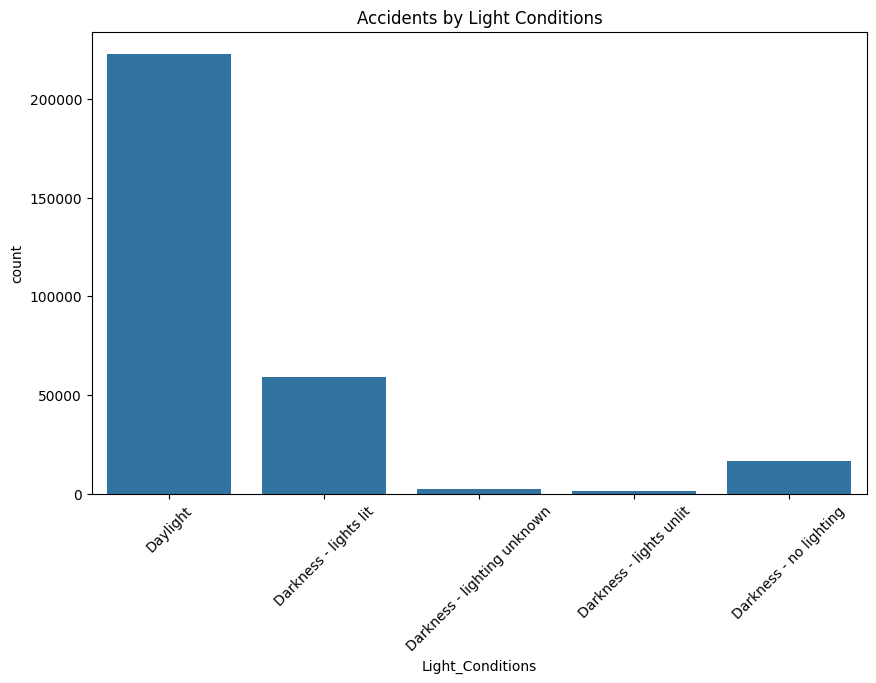


Top contributing values for Weather_Conditions:
Weather_Conditions
Fine no high winds       244453
Raining no high winds     34877
Other                      8798
Snowing no high winds      4839
Raining + high winds       3526
Name: count, dtype: int64

Top contributing values for Road_Surface_Conditions:
Road_Surface_Conditions
Dry                     204263
Wet or damp              80619
Frost or ice             11914
Snow                      4709
Flood over 3cm. deep       363
Name: count, dtype: int64

Top contributing values for Light_Conditions:
Light_Conditions
Daylight                       222958
Darkness - lights lit           59203
Darkness - no lighting          16346
Darkness - lighting unknown      2238
Darkness - lights unlit          1123
Name: count, dtype: int64

KEY INSIGHTS:
1. Accidents peak during morning and evening rush hours.
2. Wet road surfaces contribute to higher accident counts.
3. Rainy and foggy weather increases accident severity.
4. Night-time and po

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

df = pd.read_csv(r"Road Accident Data.csv")

print(df.head())
print(df.info())

df['Accident_Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['Hour'] = df['Accident_Date'].dt.hour
df['Day'] = df['Accident_Date'].dt.day_name()
df['Month'] = df['Accident_Date'].dt.month

df = df.dropna(subset=[
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Light_Conditions',
    'Latitude',
    'Longitude'
])

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Road_Surface_Conditions')
plt.xticks(rotation=45)
plt.title("Accidents by Road Surface Condition")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Weather_Conditions')
plt.xticks(rotation=45)
plt.title("Accidents by Weather Condition")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Weather_Conditions', hue='Accident_Severity')
plt.xticks(rotation=45)
plt.title("Weather vs Accident Severity")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=24)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Day')
plt.xticks(rotation=45)
plt.title("Accidents by Day of Week")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Light_Conditions')
plt.xticks(rotation=45)
plt.title("Accidents by Light Conditions")
plt.show()

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)

heat_data = df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data, radius=8).add_to(accident_map)

accident_map.save("accident_hotspots.html")
accident_map

factors = ['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']
for factor in factors:
    print(f"\nTop contributing values for {factor}:")
    print(df[factor].value_counts().head())

print("\nKEY INSIGHTS:")
print("1. Accidents peak during morning and evening rush hours.")
print("2. Wet road surfaces contribute to higher accident counts.")
print("3. Rainy and foggy weather increases accident severity.")
print("4. Night-time and poor lighting conditions show higher risk.")
print("5. Hotspots cluster around urban and high-traffic regions.")
